___
# Library import

In [1]:
import pandas as pd
import utils

___
# Data exploration

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
# 자료확인
print(df.columns) # .columns는 데이터의 열들을 확인하는 것
df.tail() # 마지막 5개 레코드를 확인하는 명령어

Index(['loan_amnt', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'total_acc', 'loan_status'],
      dtype='object')


,loan_amnt,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
218706,15000,18.49,5,1,9,1,90000.0,0,12,3,25.13,1,0,0,4104,21,1
218707,20000,6.24,1,1,10,4,125000.0,1,12,2,14.20,1,0,0,23880,30,1
218708,31050,21.99,6,1,10,1,875000.0,1,12,3,9.66,1,0,0,25770,13,1
218709,9000,9.17,2,1,1,1,80000.0,1,12,3,3.97,1,0,0,6320,17,1
218710,8000,12.59,3,1,4,3,45000.0,1,12,3,26.21,0,0,0,9097,47,1


___
# Check baseline

In [4]:
base_lr = utils.get_logistic(df)
# 로지스틱 회귀분석 - 이걸로 모델링을 해보니 앞으로 돈을 갚을지 안갚을지를 77% 확률로 예측할 수 있다는 이야기다.

# 모델링은 딱히 할 게 없긴 하다.
# 데이터 전처리가 중요하다. 대부분의 시간과 과정을 차지한다.

Accuracy: 77.88%


___
# Data Preprocessing

### Heatmap(correlation analysis)
- 서로 상관성이 높은 변수 확인

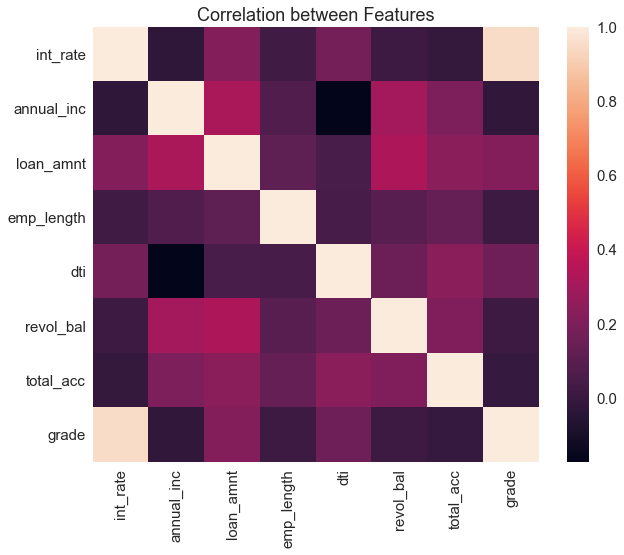

In [5]:
utils.heatmap_display(df)

# 다중 공선성을 피하기 위해 특성을 간추려야 한다.
# 과적합이라는 문제를 야기할 수 있기 때문.

#### 상관성이 높은 변수 'int_rate', 'grade'
- 신용등급과 이자율 중 신용등급 제거

In [6]:
del df['grade']

In [7]:
df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
218706,15000,18.49,1,9,1,90000.0,0,12,3,25.13,1,0,0,4104,21,1
218707,20000,6.24,1,10,4,125000.0,1,12,2,14.20,1,0,0,23880,30,1
218708,31050,21.99,1,10,1,875000.0,1,12,3,9.66,1,0,0,25770,13,1
218709,9000,9.17,1,1,1,80000.0,1,12,3,3.97,1,0,0,6320,17,1
218710,8000,12.59,1,4,3,45000.0,1,12,3,26.21,0,0,0,9097,47,1


### Histogram
- 자료의 대략적인 분포 확인

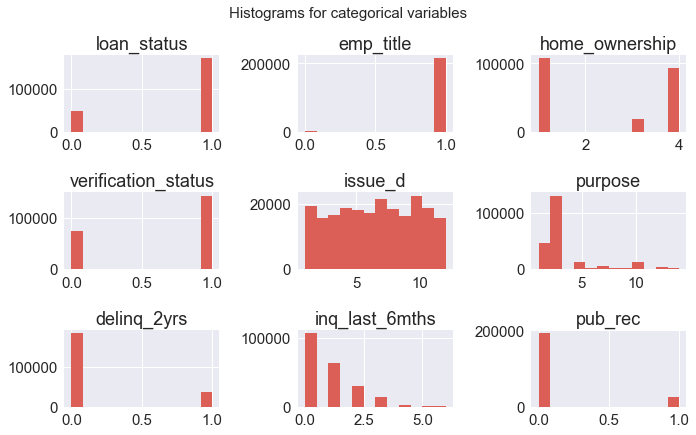

In [8]:
# 범주형 자료 히스토그램
utils.hist_display(df, 'categorical')
# 분포가 고르게 나타나지는 않는구나 하는 이야기를 확인해볼 수 있었다.

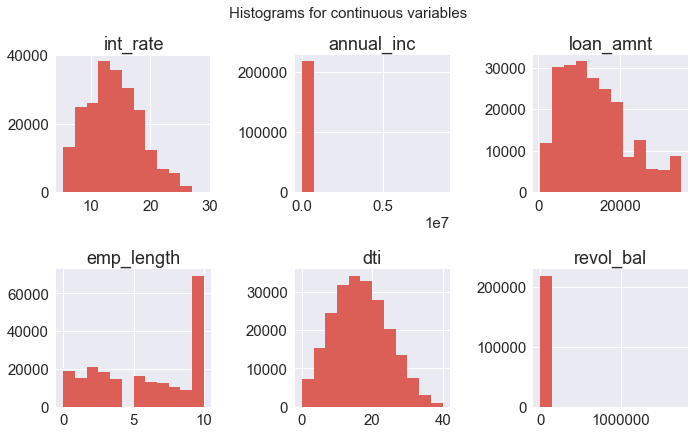

In [9]:
# 연속형 자료 히스토그램
utils.hist_display(df, 'continuous')

# 아웃라이어(이상치)로 인해 나머지의 분포가 어떤지 제대로 확인이 되지 않는다.
# 모델링의 목적은 일반적인 상황에서 돈을 빌린다고 했을 때 돈을 갚을지 아닐지를 예측하는 것.
# 이상치는 모델을 왜곡할 수 있으므로 제거를 하는 것이 중요하다.

- 연간소득(annual_inc)과 리볼빙 잔고(revol_bal)에 이상치(outlier) 발견

### Q-Q plot
- 결과 안정성 향상을 위한 자료의 정규성 확인

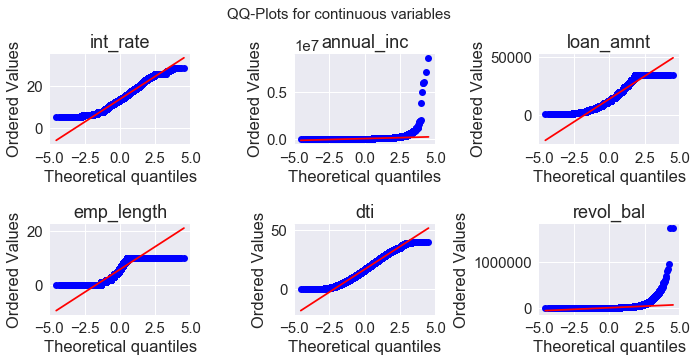

In [10]:
# 연속형 자료 Q-Q plot # 데이터가 얼마나 고르게 분포했는지의 정도를 확인하는 것이다.
# 빨간 선이 기준선이고, 파란색의 데이터 분포가 빨간선에 가깝게 이어진다면 고르게 분포, 즉, 정규분포를 이룬다고 볼 수 있다.
utils.qq_display(df)

### Remove outlier

In [11]:
cleaned_df = utils.remove_outlier(df, 'continuous', 0.001)
# 정규화는 간격을 조정하고 범주를 이치화시키는 것이다.
# 예측을 조금 더 좋게 하기 위해 로그 정규화를 시켜준다.

The number of outliers(0.1%): 2893


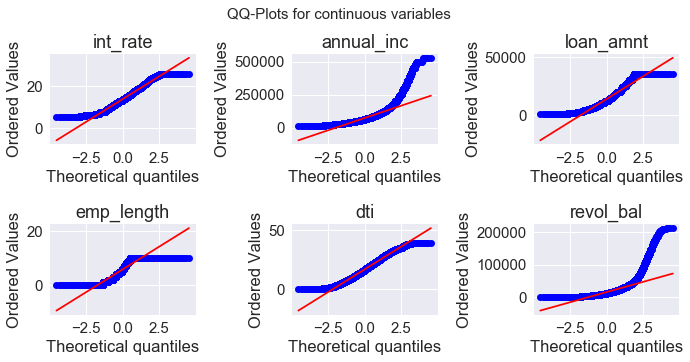

In [12]:
utils.qq_display(cleaned_df)

### Feature scaling
- 각 변수의 단위 조정

In [13]:
df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
218706,15000,18.49,1,9,1,90000.0,0,12,3,25.13,1,0,0,4104,21,1
218707,20000,6.24,1,10,4,125000.0,1,12,2,14.20,1,0,0,23880,30,1
218708,31050,21.99,1,10,1,875000.0,1,12,3,9.66,1,0,0,25770,13,1
218709,9000,9.17,1,1,1,80000.0,1,12,3,3.97,1,0,0,6320,17,1
218710,8000,12.59,1,4,3,45000.0,1,12,3,26.21,0,0,0,9097,47,1


In [14]:
scaled_df = utils.var_scaler(cleaned_df, feature_range=(0, 10)) #모든 수치들이 0 - 10 사이로 조정되었다. 이제 비교하는 것이 쉬워졌다.
scaled_df.tail()

,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,loan_status
215813,8.352941,6.027132,1,10.0,3,1.802326,1,12,3,7.719253,0,0,0,1.313549,3.428571,1
215814,4.117647,6.332364,1,9.0,1,1.511628,0,12,3,6.425467,1,0,0,0.192832,2.571429,1
215815,5.588235,0.397287,1,10.0,4,2.189922,1,12,2,3.630785,1,0,0,1.122033,3.857143,1
215816,2.352941,1.816860,1,1.0,1,1.317829,1,12,3,1.015086,1,0,0,0.296953,2.000000,1
215817,2.058824,3.473837,1,4.0,3,0.639535,1,12,3,6.701611,0,0,0,0.427434,6.285714,1


___
# Modeling and tuning

### Base performance

In [15]:
test = pd.read_csv('test_dataset.csv')
base_test = utils.get_dummy(test)

### Improved performance
- Confusion Matrix (https://en.wikipedia.org/wiki/Confusion_matrix)

In [16]:
lr = utils.get_logistic(scaled_df)

Accuracy: 77.08%


### Result analysis

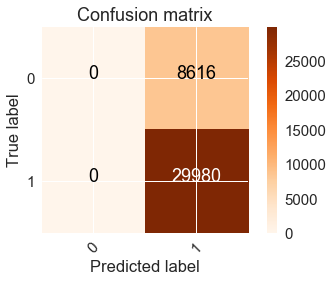

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      8616
          1       0.78      1.00      0.87     29980

avg / total       0.60      0.78      0.68     38596



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
# 기본성능 - 
utils.plot_confusion_matrix(base_test, base_lr)

# 아래의 결과는 예측은 모두 갚는다고 했는데, 실제로는 차이가 좀 있다.
# 기계가 학습을 통해 모두 갚을 것이라고 그냥 결정을 내려버리는 것이다.

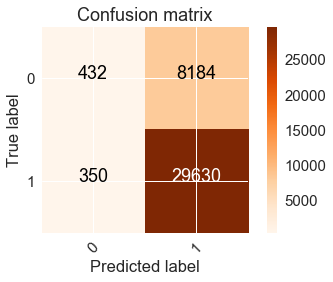

             precision    recall  f1-score   support

          0       0.55      0.05      0.09      8616
          1       0.78      0.99      0.87     29980

avg / total       0.73      0.78      0.70     38596



In [18]:
# 개선된 성능 - 테스트 셋도 변형해줘서 계산해줘야 한다.
x_test = utils.prep_data(test)
utils.plot_confusion_matrix(x_test, lr)

# 결과는 위와 다르긴 하지만, 편향이 굉장히 심각하다.
# 여기서는 도메인(분야)에 대한 지식이 중요하고,
# 그 지식으로 인해 데이터 전처리하고 수집하는 것이 결정된다.
# 

In [ ]:
# 기계의 입장에서는 10개의 데이터 중 갚는 사람 8개, 안 갚는 사람 2개의 데이터만 가지고 학습하므로
# 학습한 모델에 편향이 심각해진다.
# 그래서 두 경우의 데이터 양의 비율을 맞춰주는 것 -> 언더샘플링

# 오버샘플링은 가상의 자료를 직접 만들어주는 것으로 매우 어려운 부분이다.

### More tuning
- Undersampling 적용

In [19]:
paid, default = df['loan_status'].value_counts() # 확인해보면 두 
print(paid, default)

170369 48342


In [20]:
paid/(paid+default)

0.77896859325776935

In [21]:
under_df = utils.under_sampling(scaled_df) # 돈을 갚은 사람과 안 갚은 사람의 데이터를 균일하게 맞추는 것.
under_df['loan_status'].value_counts()

1    47699
0    47699
Name: loan_status, dtype: int64

Accuracy: 60.76%


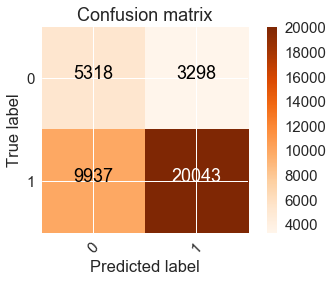

             precision    recall  f1-score   support

          0       0.35      0.62      0.45      8616
          1       0.86      0.67      0.75     29980

avg / total       0.74      0.66      0.68     38596



In [22]:
under_lr = utils.get_logistic(under_df)
utils.plot_confusion_matrix(x_test, under_lr)

# 오차가 커져서 전반적인 정확도는 낮아짐

# 이득을 본 것은 86%이므로, 모델의 어큐레이시가 모든 걸 설명하지 않는다.
# 사업에 대한 배경지식이 기준이 되어 그것에 대한 이야기를 할 수 있다.

### More results
- 각 독립변수(Feature)들의 계수(Coefficient)와 p값(p-value)이 가지는 의미해석

In [24]:
# 단순히 맞췄다 안맞췄다를 가지고 이야기한다고 했을 때에는 인공신경망(CNN)이 훨씬 나을 수 있다.
# 딥러닝은 블랙박스 모델.
# 이 기계가 맞출 수 있을 것이다 아니다를 확인할 수 없다.

In [23]:
utils.get_summary(under_df, under_lr) #

,Feature,Coefficient,p-value
0,int_rate,-0.254523,0
1,annual_inc,0.221432,0
2,loan_amnt,-0.0708825,0
3,emp_length,0.00312159,0.1355
4,dti,-0.123823,0
5,revol_bal,0.0172497,0.788
6,total_acc,0.0647629,0
7,emp_title_0,0.0315585,0.0055
8,emp_title_1,0.321666,0.7146
9,home_ownership_1,0.151827,0


In [25]:
# 이자율이 올라가면 coeffcient가 음수로, 갚을 확률이 낮아지는 것이다.
# p-value는 통계적으로 의미가 있다 없다 정도의 판단을 해주는 숫자다
# 보통 0.05보다 낮으면 통계적으로 의미가 있다고 본다.
# issue_d는 돈을 빌려준 월인데, 희한하게 12월의 경우에는 12월에 빌린 사람들은 돈을 갚을 확률이 더 많다고 한다.
# 왜 그런걸까? 모르는데, 이런 경우에 대한 프로파일링이 안되는 것은 배경지식이 없기 때문.

# Further tasks
- 변수선택(Variable selection)
- 하이퍼모수 튜닝(Hyperparameter Tuning)